### Fill out:
Name & Surname:Daniel Ong

Student ID:34897887

## W9&W10 post studio exercises (Logistic regression, Decision trees)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

%matplotlib inline

## Exercises (Logistic regression)

In this exercise you are going to construct a simple one vs rest multiclass classifier based on the probabilities for each of the binary problems for the three iris species. A one-vs-rest classification scheme constructs multiple models (one for each class) where each model predicts a binary classification and combines the results to come up with a single prediction.

For this problem, only use the first two features, i.e., `sepal length` and `sepal width` (don't standardise/normalise/etc). 

The steps for this multiclass classifier are:

* Exercise 1: 
    * Create a new features dataframe which contains only the first two columns of the iris data frame. 
    * For each of the iris categories, i.e., species_setosa, species_versicolor, and species_virginica, model the data using Logistic Regression and calculate the probabilities for the testing set of the category being correct. Store these probabilites in an array (or dataframe). For each category you will need to re-do the train-test split, but make sure you use the same random state (random state 1). Alternatively, split the data set initially with all three labels, and then work on each category. The necessary one-hot encoding has already been performed.
    * **Settings:**
        * 80/20 train-test-split with random state = 1
        * **LogisticRegression()** (meaning default solver and penalty applies)
    * **Output:** Show first 5 (rows of) probabilities for all (3) species.
* Exercise 2: 
    * For each instance in feature space (testing set), choose the category with the highest probability. The function `numpy.argmax()` will be useful.     
    * **Output:** Show first 5 entries for sepal_length, sepal_width, max probability and predicted class.
    * **Output:** Plot the final classification for the testing set in feature space, with colours based on the predicted category.
    
**Exercises 1 - 2** below correspond to the two points outlined above.

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

In [ ]:
iris = sns.load_dataset('iris') # load the dataset from seaborn

species_one_hots =  pd.get_dummies(iris.species, prefix = 'species')
iris = pd.concat([iris, species_one_hots], axis = 1)

### Exercise 1

In [1]:
# Part 1
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = sns.load_dataset('iris')

# One-hot encoding for species
species_one_hots = pd.get_dummies(iris.species, prefix='species')
iris = pd.concat([iris, species_one_hots], axis=1)

# Step 1: Extract only sepal_length and sepal_width as features
X = iris[['sepal_length', 'sepal_width']]

# Prepare the target variables for each class
y_setosa = iris['species_setosa']
y_versicolor = iris['species_versicolor']
y_virginica = iris['species_virginica']

# Step 2: Split the data (80/20 split with random_state=1)
X_train, X_test, y_train_setosa, y_test_setosa = train_test_split(X, y_setosa, test_size=0.2, random_state=1)
_, _, y_train_versicolor, y_test_versicolor = train_test_split(X, y_versicolor, test_size=0.2, random_state=1)
_, _, y_train_virginica, y_test_virginica = train_test_split(X, y_virginica, test_size=0.2, random_state=1)

# Step 3: Logistic Regression models for each species
model_setosa = LogisticRegression()
model_versicolor = LogisticRegression()
model_virginica = LogisticRegression()

# Fit models
model_setosa.fit(X_train, y_train_setosa)
model_versicolor.fit(X_train, y_train_versicolor)
model_virginica.fit(X_train, y_train_virginica)

# Step 4: Calculate probabilities on the test set
prob_setosa = model_setosa.predict_proba(X_test)[:, 1]  # Probability of being setosa
prob_versicolor = model_versicolor.predict_proba(X_test)[:, 1]  # Probability of being versicolor
prob_virginica = model_virginica.predict_proba(X_test)[:, 1]  # Probability of being virginica

# Store probabilities in a dataframe
prob_df = pd.DataFrame({
    'prob_setosa': prob_setosa,
    'prob_versicolor': prob_versicolor,
    'prob_virginica': prob_virginica
})

# Output: First 5 rows of probabilities for each species
print(prob_df.head())


   prob_setosa  prob_versicolor  prob_virginica
0     0.742914         0.040603        0.225749
1     0.302666         0.519712        0.099330
2     0.013205         0.307877        0.678468
3     0.889100         0.047435        0.116070
4     0.001814         0.083273        0.960356


### Exercise 2

   sepal_length  sepal_width  max_probability predicted_species
0           5.8          4.0         0.742914            setosa
1           5.1          2.5         0.519712        versicolor
2           6.6          3.0         0.678468         virginica
3           5.4          3.9         0.889100            setosa
4           7.9          3.8         0.960356         virginica


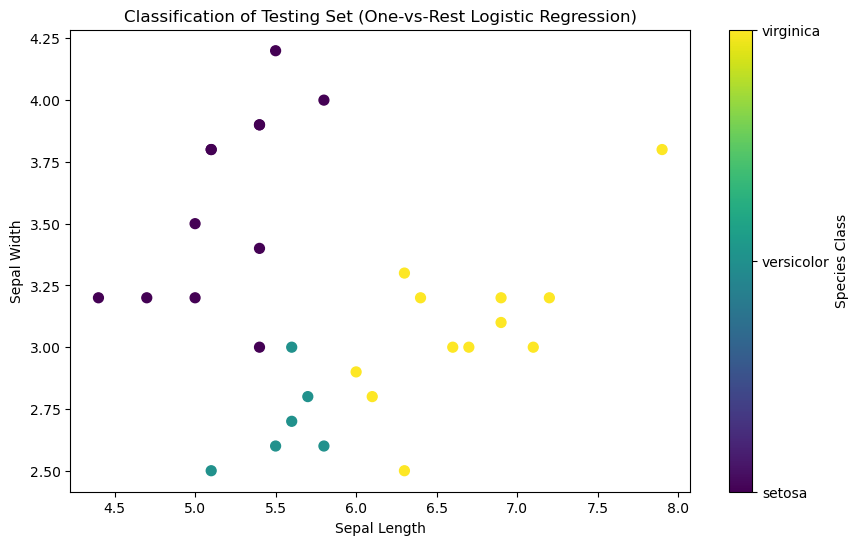

In [2]:
# Part 2
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Step 1: Predict class based on the highest probability
# For each instance in the test set, choose the class with the highest probability
prob_df['predicted_class'] = np.argmax(prob_df.values, axis=1)

# Map the predicted class indices back to species names
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
prob_df['predicted_species'] = prob_df['predicted_class'].map(class_mapping)

# Output the first 5 rows of sepal_length, sepal_width, max probability, and predicted class
X_test_reset = X_test.reset_index(drop=True)  # Reset index for easier concatenation
output_df = X_test_reset.copy()
output_df['max_probability'] = prob_df[['prob_setosa', 'prob_versicolor', 'prob_virginica']].max(axis=1)
output_df['predicted_species'] = prob_df['predicted_species']

# Output the first 5 rows
print(output_df[['sepal_length', 'sepal_width', 'max_probability', 'predicted_species']].head())

# Step 2: Plotting the classification in feature space
plt.figure(figsize=(10, 6))

# Scatter plot with color based on predicted species
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], 
            c=prob_df['predicted_class'], cmap='viridis', s=50)

# Plot decorations
plt.title("Classification of Testing Set (One-vs-Rest Logistic Regression)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(ticks=[0, 1, 2], label='Species Class', format=plt.FuncFormatter(lambda val, loc: ['setosa', 'versicolor', 'virginica'][int(val)]))
plt.show()


# Answers

### Hardest classes to predict

Versicolor and Virginica are the classes that are relativelty difficult to distinguish, because the decision boundaries for Versicolor and Virginica often overlap, especially when considering only sepal length and sepal width. They (Versicolor and Virginica) show greater overlap in their feature space (sepal length and width), making them harder to differentiate accurately. This is evident when the model incorrectly classifies Virginica as Versicolor, or vice versa.

### Improvements for the model

To improve the model's accuracy, including additional features like petal_length and petal_width would greatly enhance the model's ability to differentiate between Versicolor and Virginica, as these features are known to be more informative. Additionally, applying cross-validation would help better assess the model's performance across various data splits, reducing the risk of overfitting or underfitting and ensuring more robust predictions

## Exercises (Decision trees)

For these exercises we will model a dataset of the properties of wheat seeds, which you can download from GitLab: 

[seeds_dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Supervised-Methods/Decision-Trees/seeds_dataset.csv)

This is originally from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds). The seedtype is an integer (1, 2, or 3) corresponding to the three classes `Kama`, `Rosa` and `Canadian` in the classes list below.

Run all the cells below before writing your solutions; don't standardise/normalise/etc.

In [ ]:
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                   names=['area','perimeter','compactness','length','width','asymmetry',
                         'groovelength','seedtype'])
classes = ['Kama', 'Rosa', 'Canadian']

In [ ]:
seeds.head()

Split the data into features and labels, and into a training and testing set.

In [ ]:
X_ex = seeds.drop('seedtype', axis = 1)
y_ex = seeds['seedtype']

X_train, X_test, y_train, y_test = train_test_split(
    X_ex, y_ex, random_state = 42
)

### Exercise 3

Create a simple Decision Tree of maximum depth=3 and fit the training data to this model.

**Settings for decision tree:**

* random state 42
* max depth 3

Plot the decision tree for this model, and identify the most significant features for the classification of this dataset.

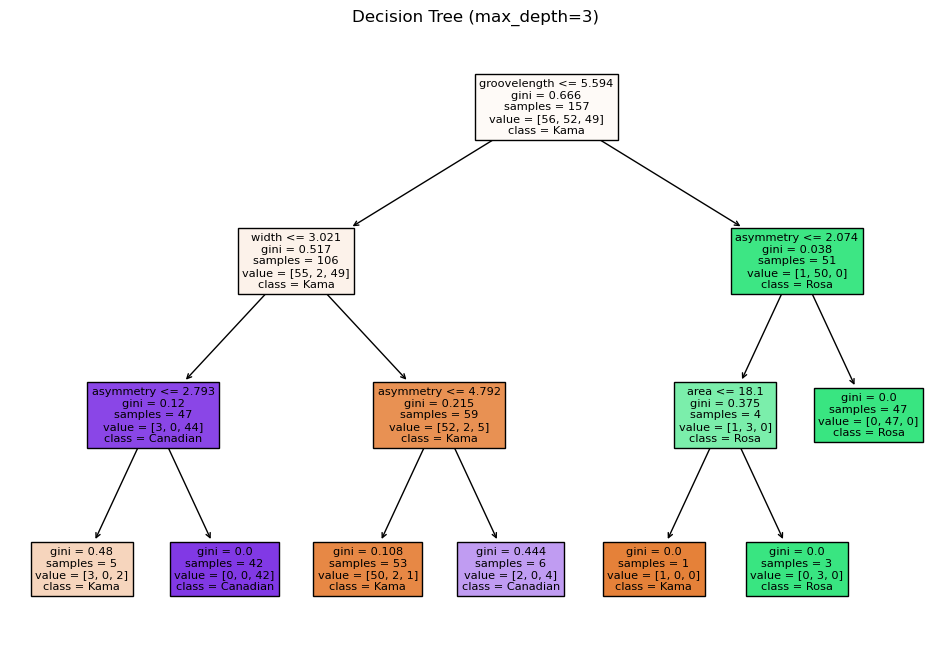

Accuracy of the Decision Tree model: 88.68%
The most important features:

groovelength: 0.5098
width: 0.3893
asymmetry: 0.0849
area: 0.0160
perimeter: 0.0000
compactness: 0.0000
length: 0.0000


In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the seeds dataset
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                    names=['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
                           'groovelength', 'seedtype'])

# Step 1: Split the data into features (X_ex) and labels (y_ex)
X_ex = seeds.drop('seedtype', axis=1)
y_ex = seeds['seedtype']

# Step 2: Split the data into training and testing sets (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, random_state=42)

# Step 3: Create a Decision Tree model with max_depth=3 and random_state=42
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Step 4: Convert feature names from pandas Index to a Python list
feature_names = X_ex.columns.tolist()

# Step 5: Plot the decision tree to visualize the splits and important features
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=feature_names, class_names=['Kama', 'Rosa', 'Canadian'], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# Step 6: Predict the classes for the test set
y_pred = decision_tree.predict(X_test)

# Step 7: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")

# Step 8: Get the feature importances from the fitted decision tree model
importances = decision_tree.feature_importances_

# Step 9: Create a dictionary mapping feature names to their importance scores
feature_importances = dict(zip(feature_names, importances))

# Step 10: Sort the features by importance in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Step 11: Print the feature importances in a readable format
print("The most important features:\n")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


### Exercise 4

Plot the confusion matrix for this model, and calculate the accuracy.

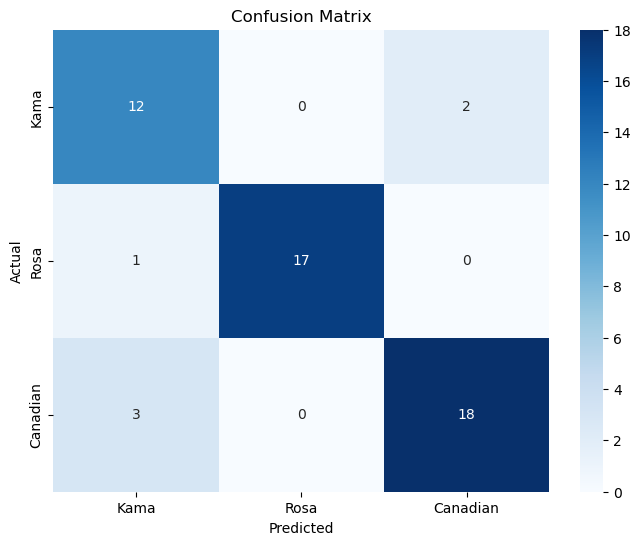

Accuracy of the Decision Tree model: 88.68%


In [6]:
# Importing necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the test set
y_pred = decision_tree.predict(X_test)

# Step 2: Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Kama', 'Rosa', 'Canadian'], 
            yticklabels=['Kama', 'Rosa', 'Canadian'])

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")
